<a href="https://colab.research.google.com/github/PriyankaDhar2/Minor-Projects/blob/main/CustomerSegmentation%26Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Univariate Analysis**

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

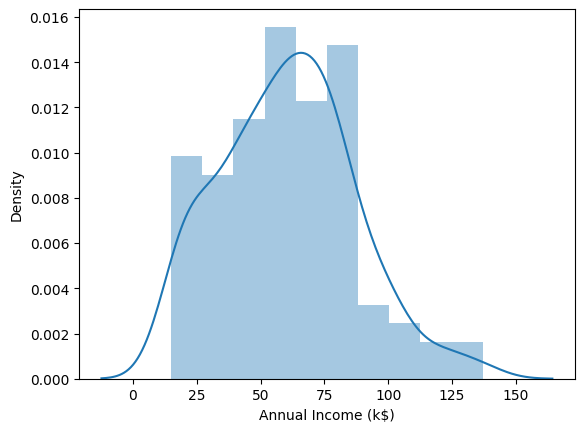

In [ ]:
sb.distplot(df['Annual Income (k$)'])

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

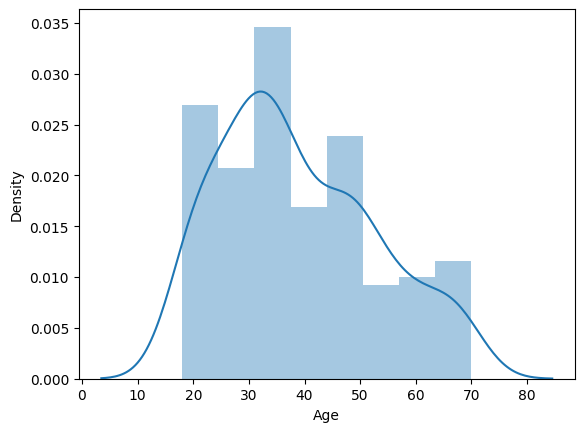

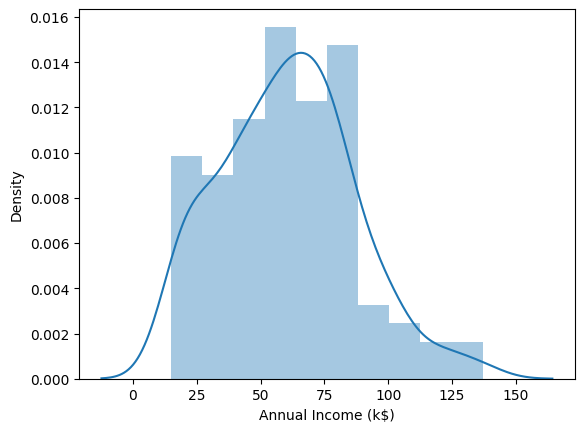

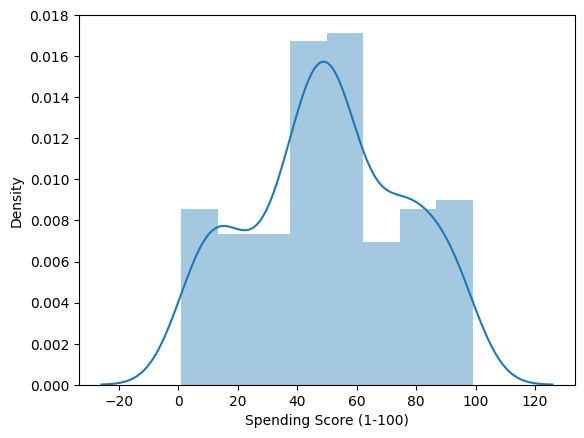

In [ ]:
columns = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sb.distplot(df[i])

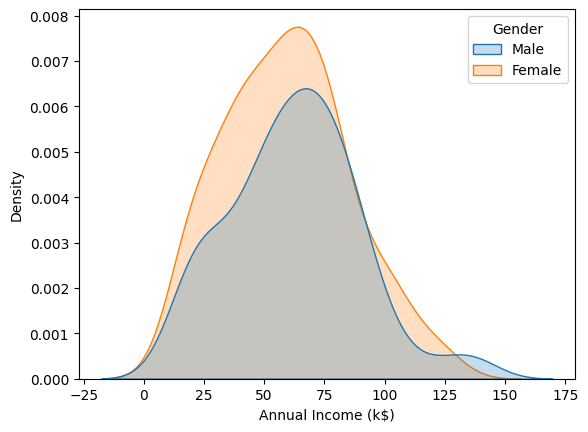

In [ ]:
sb.kdeplot(x=df['Annual Income (k$)'],shade=True,hue=df['Gender']);

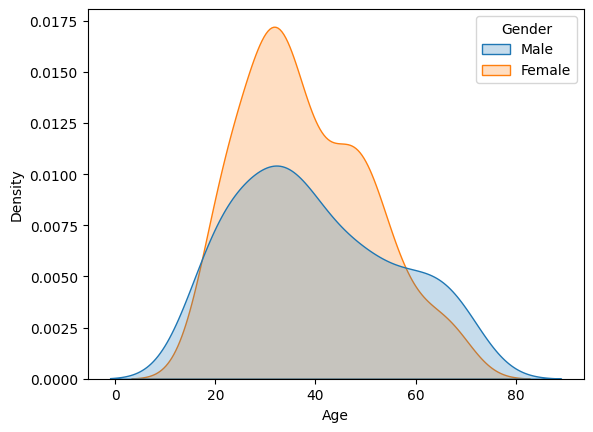

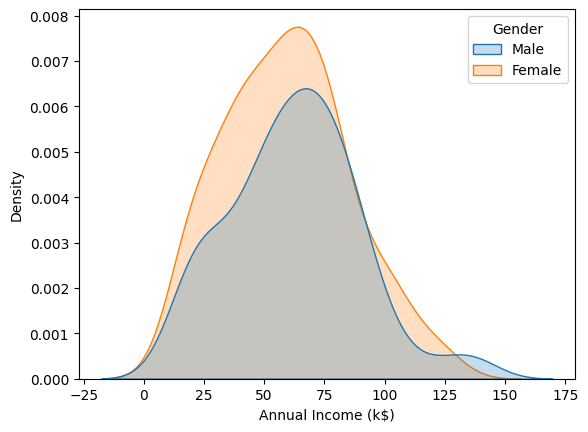

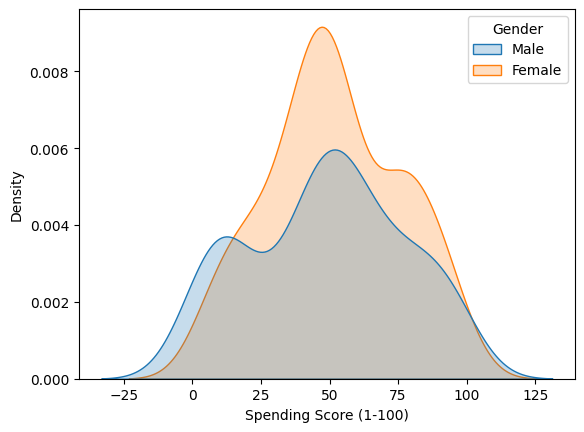

In [ ]:
columns = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sb.kdeplot(x=df[i],shade=True,hue=df['Gender']);

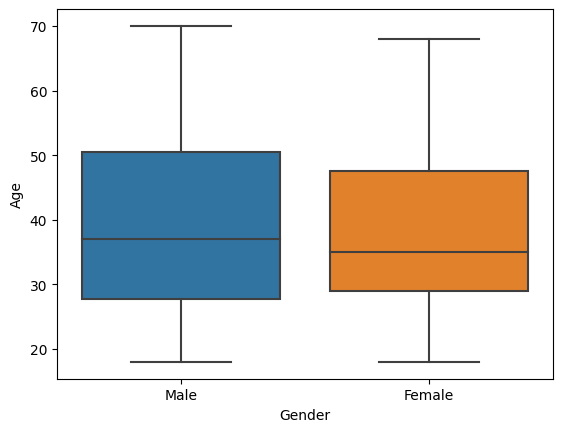

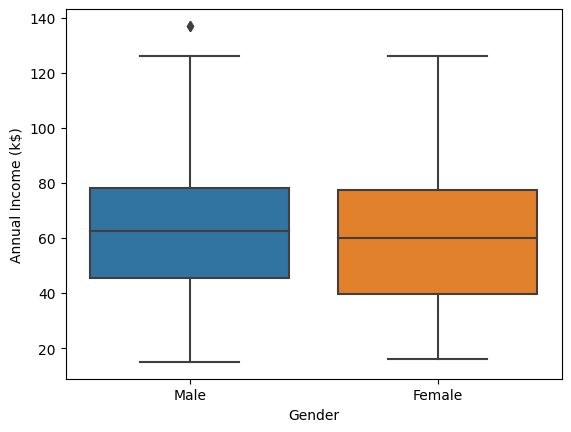

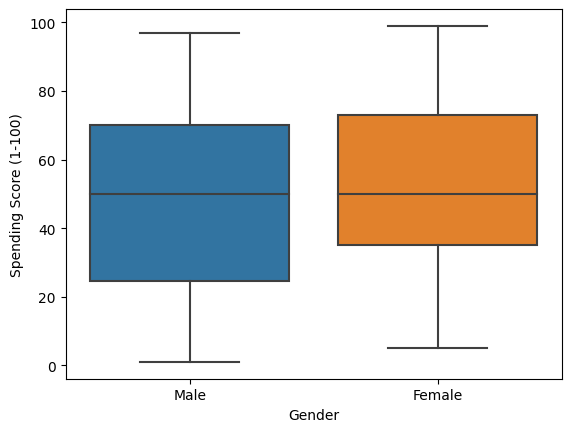

In [ ]:
columns = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sb.boxplot(data=df,x='Gender',y=df[i]);

In [ ]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## **Bivariate Analysis**

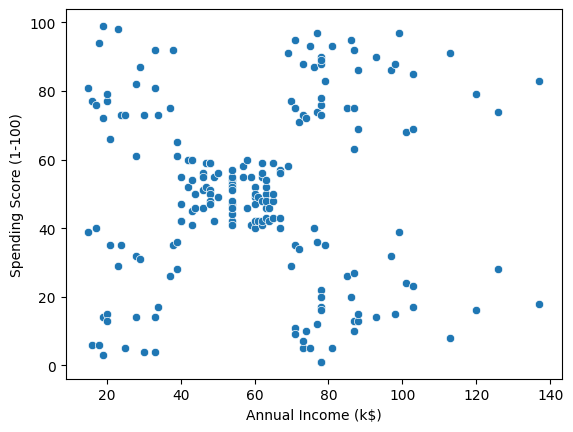

In [ ]:
sb.scatterplot(data=df,x='Annual Income (k$)', y=('Spending Score (1-100)'));

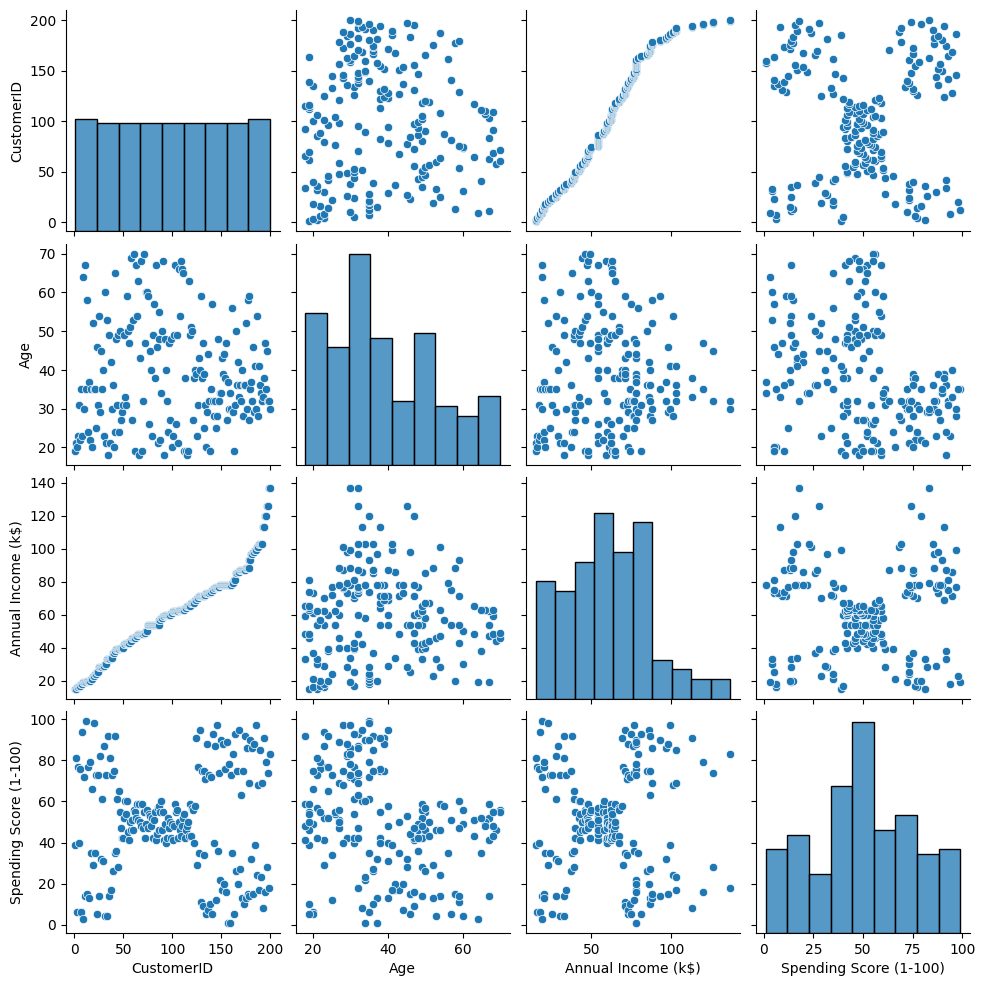

In [ ]:
sb.pairplot(df);

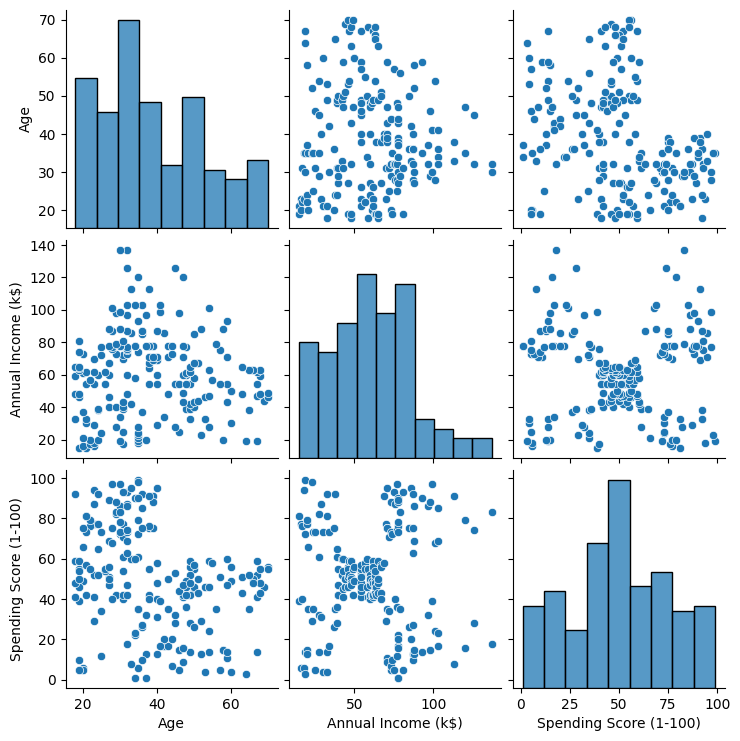

In [ ]:
df1=df.drop('CustomerID',axis=1)
sb.pairplot(df1);

In [ ]:
df1.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df1.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

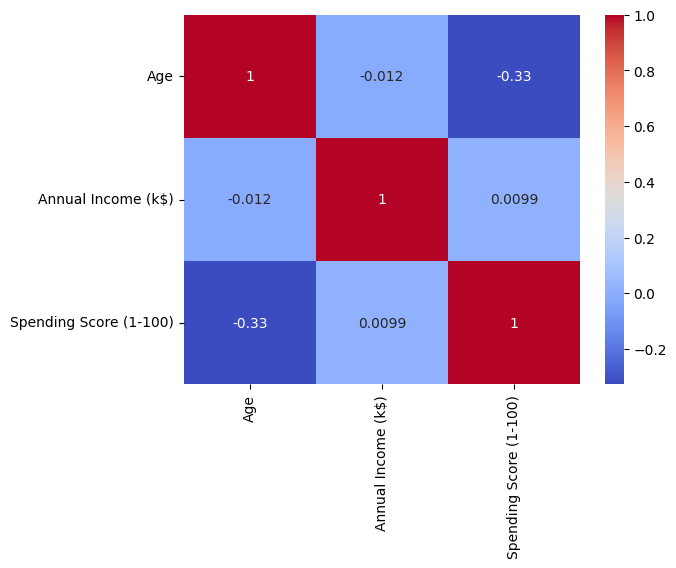

In [ ]:
sb.heatmap(df1.corr(),annot=True,cmap='coolwarm')

## Clustering - Univariate, Bivariate, Multivariate using K-means

In [ ]:
clus1= KMeans(n_clusters=3)

In [ ]:
clus1.fit(df1[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
clus1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
df1['Income Cluster']= clus1.labels_
df1.head

<bound method NDFrame.head of      Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster
0      Male   19                  15                      39               0
1      Male   21                  15                      81               0
2    Female   20                  16                       6               0
3    Female   23                  16                      77               0
4    Female   31                  17                      40               0
..      ...  ...                 ...                     ...             ...
195  Female   35                 120                      79               2
196  Female   45                 126                      28               2
197    Male   32                 126                      74               2
198    Male   32                 137                      18               2
199    Male   30                 137                      83               2

[200 rows x 5 columns]>

In [ ]:
df1['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [ ]:
clus1.inertia_

23517.33093093093

In [ ]:
inertia_scores=[]

In [ ]:
for i in range(1,11):
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(df1[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [ ]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3976.3583638583646,
 2822.4996947496966,
 2189.2563714063717,
 1743.4772727272739]

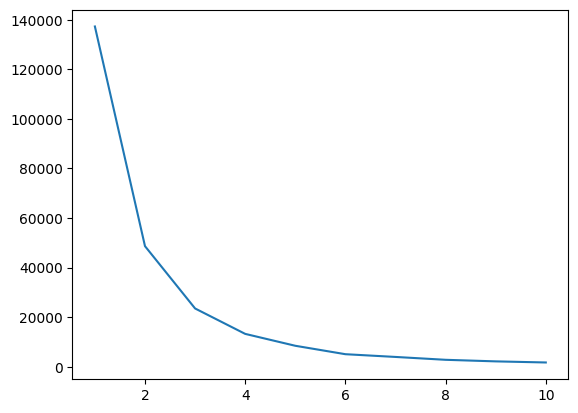

In [ ]:
plt.plot(range(1,11),inertia_scores)

In [ ]:
df1.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [ ]:
df1.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [ ]:
clus2=KMeans(n_clusters=5)
clus2.fit(df1[['Annual Income (k$)','Spending Score (1-100)']])
df1['Spending and Income Cluster']= clus2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


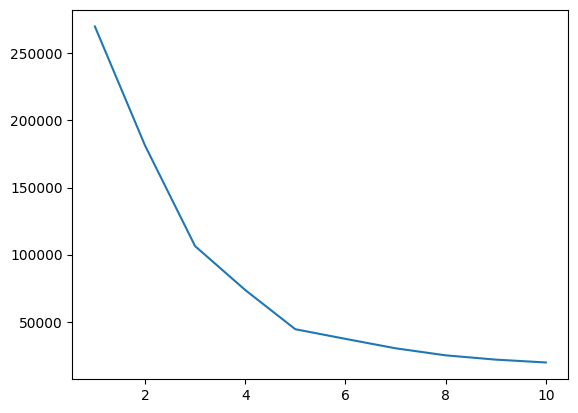

In [ ]:
in_scores2=[]
for i in range(1,11):
  kmeans2= KMeans(n_clusters=i)
  kmeans2.fit(df1[['Annual Income (k$)','Spending Score (1-100)']])
  in_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),in_scores2);

In [ ]:
centers = pd.DataFrame(clus2.cluster_centers_)
centers.columns = ['x','y']

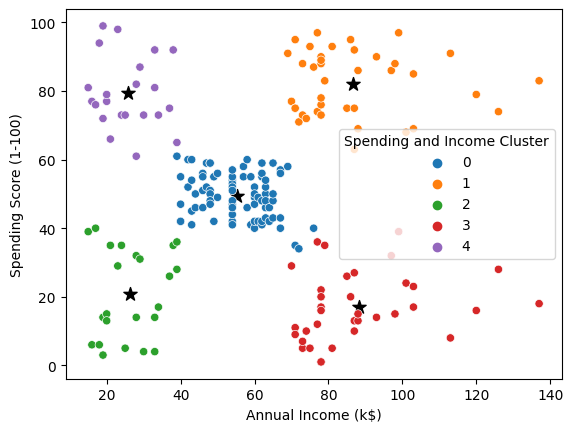

In [ ]:
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sb.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10');

In [ ]:
pd.crosstab(df1['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.457143,0.542857
4,0.590909,0.409091


In [ ]:
df1.groupby('Spending and Income Cluster')['Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [ ]:
#Multivariate Cluster
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2


In [ ]:
df2=pd.get_dummies(df1,drop_first=True)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,4,1
2,20,16,6,0,2,0
3,23,16,77,0,4,0
4,31,17,40,0,2,0


In [ ]:
df2.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [ ]:
df2=df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
df2=scale.fit_transform(df2)

In [ ]:
df2=pd.DataFrame(scale.fit_transform(df2))

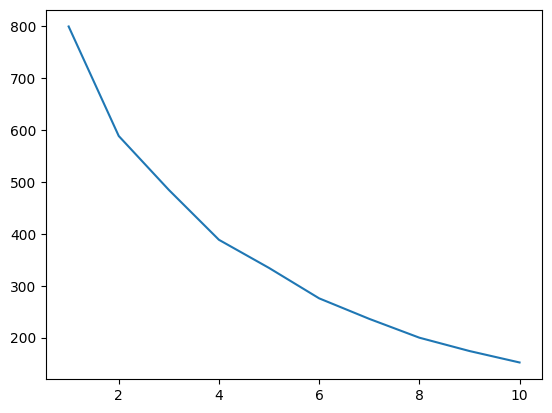

In [ ]:
in_scores3=[]
for i in range(1,11):
  kmeans3= KMeans(n_clusters=i)
  kmeans3.fit(df2)
  in_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),in_scores3);

In [ ]:
df.to_csv('Mall_Clustering.csv')